In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

data_name = "circle"
training_type = ['individial_layers', 'exchange_layers','training_exchange_layers', 'training_exchange_layers_e']
algorithm = 'qdpso'
tipe = ["training", "test", "val"]

# Training

In [2]:
execution_time_ind = np.load(f"../output/{training_type[0]}/{data_name}/{data_name}_start_end_execution_time.npy")
execution_time_ex = np.load(f"../output/{training_type[1]}/{data_name}/{data_name}_start_end_execution_time.npy")
execution_time_ex_c = np.load(f"../output/{training_type[2]}/{data_name}/{data_name}_start_end_execution_time.npy")
execution_time_ex_c_ex = np.load(f"../output/{training_type[3]}/{data_name}/{data_name}_start_end_execution_time.npy")

print("Individual Layer time (second): ", execution_time_ind[2])
print("Individual Exchange Layer time (second): ", execution_time_ex[2])
print("Concurrence Iter layer Exchange time (second): ", execution_time_ex_c[2])
print("Concurrence Iter layer and Layer Exchange time (second): ", execution_time_ex_c_ex[2])

Individual Layer time (second):  38.75570200000038
Individual Exchange Layer time (second):  40.93639729999995
Concurrence Iter layer Exchange time (second):  13.649889899999835
Concurrence Iter layer and Layer Exchange time (second):  13.600081600001431


In [3]:
def extract_training_data_from_file(filename):
    """Extrae datos de entrenamiento de un archivo CSV."""
    df = pd.read_csv(filename)
    return df[df['Layer'].str.startswith('total_training')]['Duration (seconds)'].values

def visualize_training_combined_table(training_types, data_name, algorithm, tipe):
    # Crear un diccionario para albergar los datos
    data = {'Training': []}
    
    # Para cada tipo de entrenamiento, extraer y agregar los datos de entrenamiento al diccionario
    for training_type in training_types:
        file_path = f'../output/{training_type}/{data_name}/{algorithm}_{data_name}_{tipe[0]}_time.csv'  # Utilizamos tipe[0] aquí
        durations = extract_training_data_from_file(file_path)
        
        # Si la lista 'Training Iteration' está vacía, llenarla con los números de iteración
        if not data['Training']:
            data['Training'] = [f'Training {i+1}' for i in range(len(durations))]
        
        data[training_type] = durations

    # Crear el DataFrame
    df_combined = pd.DataFrame(data)
    
    # Crear un DataFrame para "Average", "Std", "Best", y "Worst"
    summary_data = {
        'Training': ['Average', 'Std', 'Best', 'Worst'],
        training_types[0]: [df_combined[training_types[0]].mean(), df_combined[training_types[0]].std(), df_combined[training_types[0]].min(), df_combined[training_types[0]].max()],
        training_types[1]: [df_combined[training_types[1]].mean(), df_combined[training_types[1]].std(), df_combined[training_types[1]].min(), df_combined[training_types[1]].max()],
        training_types[2]: [df_combined[training_types[2]].mean(), df_combined[training_types[2]].std(), df_combined[training_types[2]].min(), df_combined[training_types[2]].max()],
        training_types[3]: [df_combined[training_types[3]].mean(), df_combined[training_types[3]].std(), df_combined[training_types[3]].min(), df_combined[training_types[3]].max()]
    }
    df_summary = pd.DataFrame(summary_data)

    # Concatenar el DataFrame original con el resumen
    df_combined = pd.concat([df_combined, df_summary], ignore_index=True)
    
    # Mostrar el DataFrame
    display(df_combined)

visualize_training_combined_table(training_type, data_name, algorithm, tipe)

,Training,individial_layers,exchange_layers,training_exchange_layers,training_exchange_layers_e
0,Training 1,2.529875,2.457449,0.860702,0.840276
1,Training 2,2.491414,2.495510,0.828799,0.819812
2,Training 3,2.495329,2.464049,0.827664,0.811667
3,Training 4,2.518584,2.676964,0.837020,0.831052
4,Training 5,2.619210,2.602264,0.834480,0.794772
5,Training 6,2.584340,2.831978,0.818703,0.828267
6,Training 7,2.514374,2.697404,0.849429,0.847506
7,Training 8,2.464896,2.812059,0.826793,0.847405
8,Training 9,2.492060,2.777623,0.818469,0.835264
9,Training 10,2.498968,2.683584,0.870998,0.880590


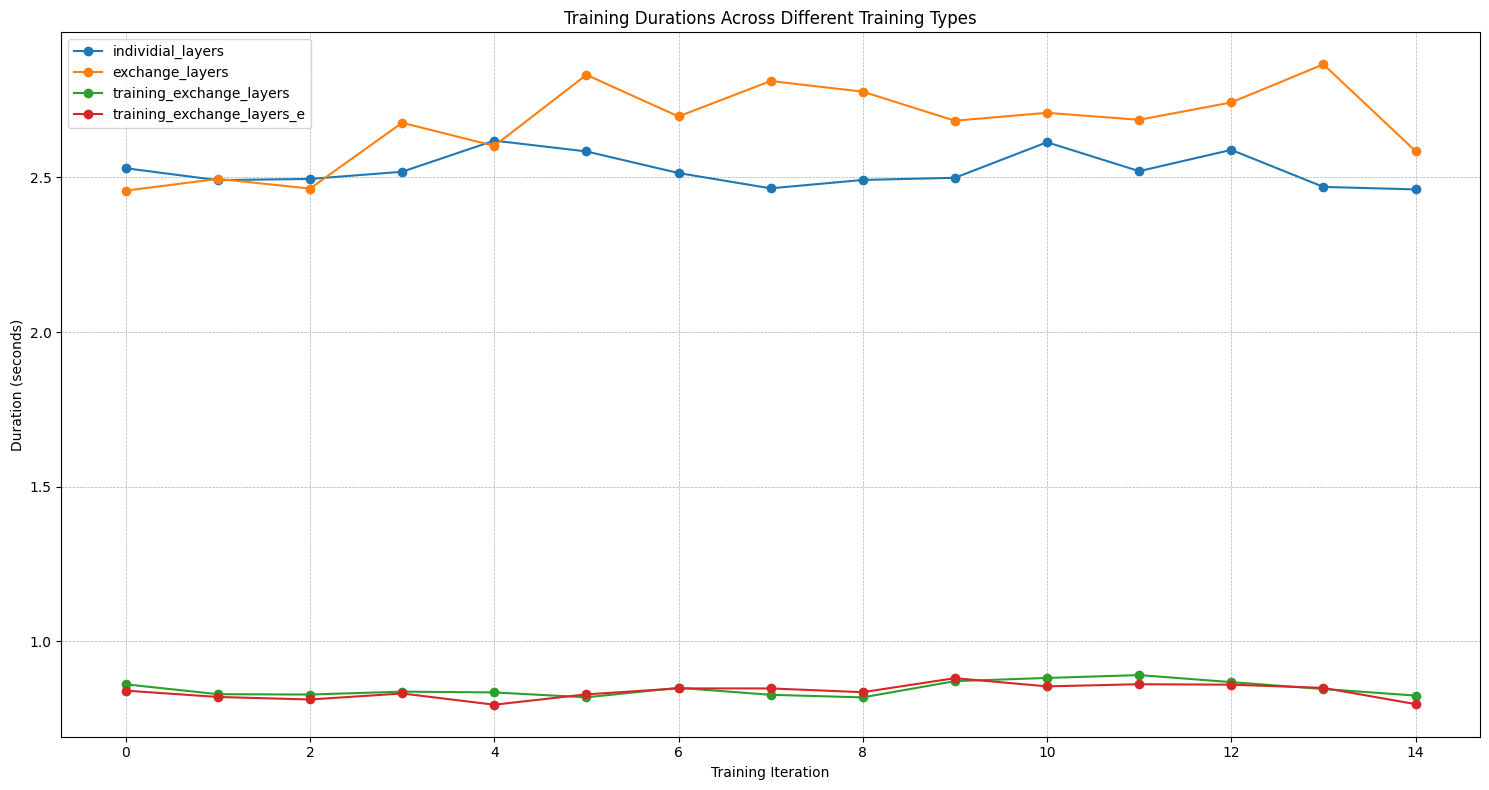

In [4]:
def visualize_training_graph(training_types, data_name, algorithm, tipe):
    # Crear un gráfico
    plt.figure(figsize=(15, 8))
    
    for training_type in training_types:
        file_path = f'../output/{training_type}/{data_name}/{algorithm}_{data_name}_{tipe[0]}_time.csv'
        durations = extract_training_data_from_file(file_path)
        
        plt.plot(durations, label=training_type, marker='o')
        
    plt.title('Training Durations Across Different Training Types')
    plt.xlabel('Training Iteration')
    plt.ylabel('Duration (seconds)')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

visualize_training_graph(training_type, data_name, algorithm, tipe)

# Testing

In [5]:
def extract_testing_data_from_file(filename):
    """Extrae datos de testeo de un archivo CSV."""
    df = pd.read_csv(filename)
    return df[df['Layer'].str.startswith('total_test')]['Duration (seconds)'].values

def visualize_testing_combined_table(training_types, data_name, algorithm, tipe):
    # Crear un diccionario para albergar los datos
    data = {'Testing': []}
    
    # Para cada tipo de entrenamiento, extraer y agregar los datos de testeo al diccionario
    for training_type in training_types:
        file_path = f'../output/{training_type}/{data_name}/{algorithm}_{data_name}_{tipe[1]}_time.csv'  # Utilizamos tipe[1] aquí
        durations = extract_testing_data_from_file(file_path)
        
        # Si la lista 'Testing Iteration' está vacía, llenarla con los números de iteración
        if not data['Testing']:
            data['Testing'] = [f'Testing {i+1}' for i in range(len(durations))]
        
        data[training_type] = durations

    # Crear el DataFrame
    df_combined = pd.DataFrame(data)
    
    # Crear un DataFrame para "Average", "Std", "Best", y "Worst"
    summary_data = {
        'Testing': ['Average', 'Std', 'Best', 'Worst'],
        training_types[0]: [df_combined[training_types[0]].mean(), df_combined[training_types[0]].std(), df_combined[training_types[0]].min(), df_combined[training_types[0]].max()],
        training_types[1]: [df_combined[training_types[1]].mean(), df_combined[training_types[1]].std(), df_combined[training_types[1]].min(), df_combined[training_types[1]].max()],
        training_types[2]: [df_combined[training_types[2]].mean(), df_combined[training_types[2]].std(), df_combined[training_types[2]].min(), df_combined[training_types[2]].max()],
        training_types[3]: [df_combined[training_types[3]].mean(), df_combined[training_types[3]].std(), df_combined[training_types[3]].min(), df_combined[training_types[3]].max()]
    }
    df_summary = pd.DataFrame(summary_data)

    # Concatenar el DataFrame original con el resumen
    df_combined = pd.concat([df_combined, df_summary], ignore_index=True)
    
    # Mostrar el DataFrame
    display(df_combined)

visualize_testing_combined_table(training_type, data_name, algorithm, tipe)


,Testing,individial_layers,exchange_layers,training_exchange_layers,training_exchange_layers_e
0,Testing 1,0.000267,0.000102,0.000074,0.000066
1,Testing 2,0.000095,0.000102,0.000068,0.000075
2,Testing 3,0.000110,0.000097,0.000066,0.000076
3,Testing 4,0.000094,0.000098,0.000070,0.000066
4,Testing 5,0.000165,0.000097,0.000088,0.000068
5,Testing 6,0.000100,0.000096,0.000064,0.000065
6,Testing 7,0.000099,0.000115,0.000072,0.000067
7,Testing 8,0.000101,0.000111,0.000082,0.000064
8,Testing 9,0.000095,0.000096,0.000070,0.000067
9,Testing 10,0.000099,0.000096,0.000063,0.000096


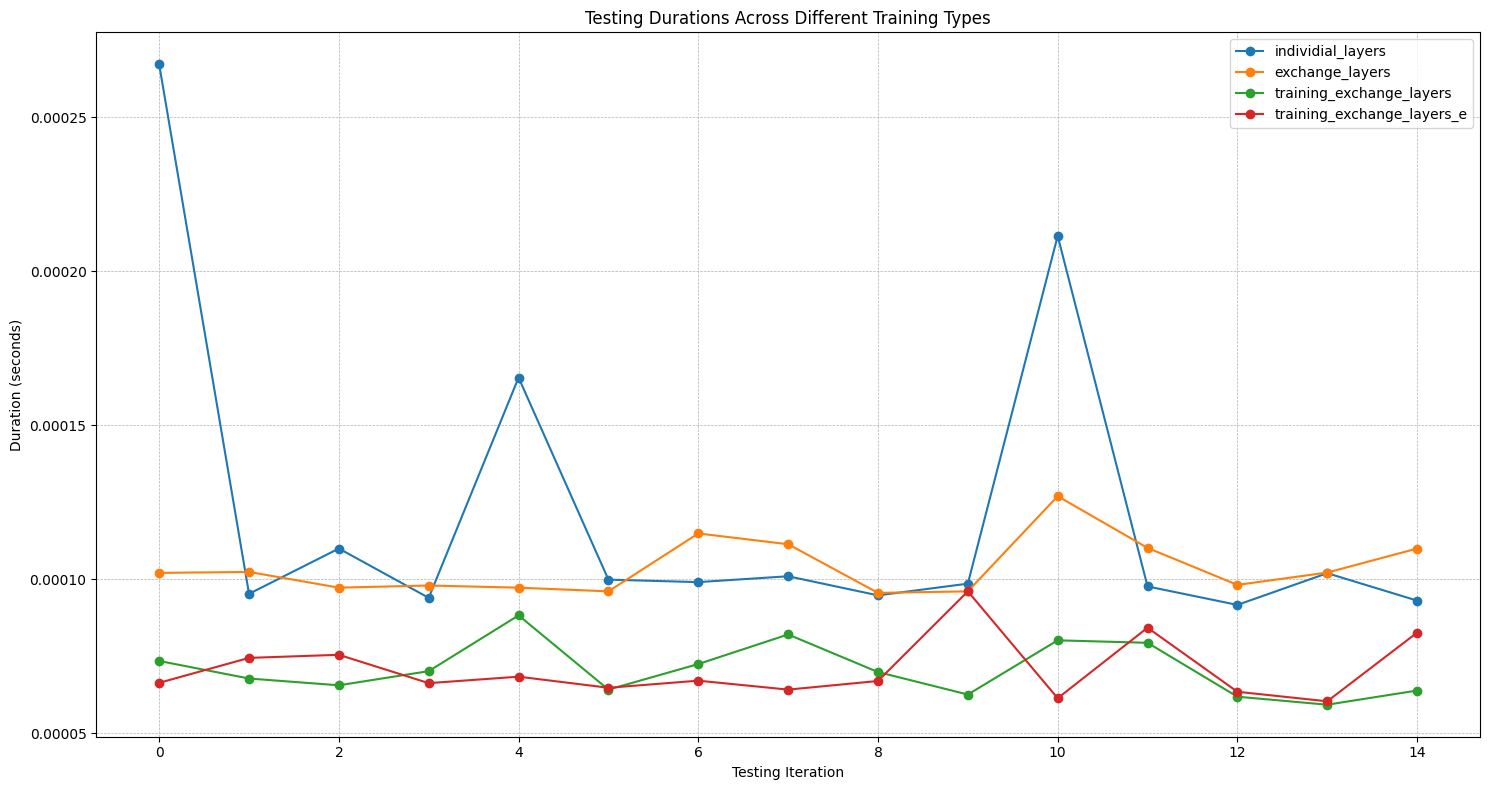

In [6]:
def visualize_testing_graph(training_types, data_name, algorithm, tipe):
    # Crear un gráfico
    plt.figure(figsize=(15, 8))
    
    for training_type in training_types:
        file_path = f'../output/{training_type}/{data_name}/{algorithm}_{data_name}_{tipe[1]}_time.csv'
        durations = extract_testing_data_from_file(file_path)
        
        plt.plot(durations, label=training_type, marker='o')
        
    plt.title('Testing Durations Across Different Training Types')
    plt.xlabel('Testing Iteration')
    plt.ylabel('Duration (seconds)')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

visualize_testing_graph(training_type, data_name, algorithm, tipe)

# Validation

In [7]:
def extract_validation_data_from_file(filename):
    """Extrae datos de validación de un archivo CSV."""
    df = pd.read_csv(filename)
    return df[df['Layer'].str.startswith('total_val')]['Duration (seconds)'].values

def visualize_validation_combined_table(training_types, data_name, algorithm, tipe):
    # Crear un diccionario para albergar los datos
    data = {'Validation': []}
    
    # Para cada tipo de entrenamiento, extraer y agregar los datos de validación al diccionario
    for training_type in training_types:
        file_path = f'../output/{training_type}/{data_name}/{algorithm}_{data_name}_{tipe[2]}_time.csv'  # Utilizamos tipe[2] aquí
        durations = extract_validation_data_from_file(file_path)
        
        # Si la lista 'Validation Iteration' está vacía, llenarla con los números de iteración
        if not data['Validation']:
            data['Validation'] = [f'Validation {i+1}' for i in range(len(durations))]
        
        data[training_type] = durations

    # Crear el DataFrame
    df_combined = pd.DataFrame(data)
    
    # Crear un DataFrame para "Average", "Std", "Best", y "Worst"
    summary_data = {
        'Validation': ['Average', 'Std', 'Best', 'Worst'],
        training_types[0]: [df_combined[training_types[0]].mean(), df_combined[training_types[0]].std(), df_combined[training_types[0]].min(), df_combined[training_types[0]].max()],
        training_types[1]: [df_combined[training_types[1]].mean(), df_combined[training_types[1]].std(), df_combined[training_types[1]].min(), df_combined[training_types[1]].max()],
        training_types[2]: [df_combined[training_types[2]].mean(), df_combined[training_types[2]].std(), df_combined[training_types[2]].min(), df_combined[training_types[2]].max()],
        training_types[3]: [df_combined[training_types[3]].mean(), df_combined[training_types[3]].std(), df_combined[training_types[3]].min(), df_combined[training_types[3]].max()]
    }
    df_summary = pd.DataFrame(summary_data)

    # Concatenar el DataFrame original con el resumen
    df_combined = pd.concat([df_combined, df_summary], ignore_index=True)
    
    # Mostrar el DataFrame
    display(df_combined)

visualize_validation_combined_table(training_type, data_name, algorithm, tipe)



,Validation,individial_layers,exchange_layers,training_exchange_layers,training_exchange_layers_e
0,Validation 1,0.000065,0.000063,0.000054,0.000059
1,Validation 2,0.000063,0.000063,0.000059,0.000055
2,Validation 3,0.000064,0.000062,0.000058,0.000058
3,Validation 4,0.000065,0.000064,0.000052,0.000058
4,Validation 5,0.000083,0.000062,0.000062,0.000057
5,Validation 6,0.000080,0.000062,0.000058,0.000058
6,Validation 7,0.000061,0.000062,0.000058,0.000058
7,Validation 8,0.000062,0.000059,0.000055,0.000056
8,Validation 9,0.000063,0.000066,0.000058,0.000057
9,Validation 10,0.000075,0.000063,0.000057,0.000064


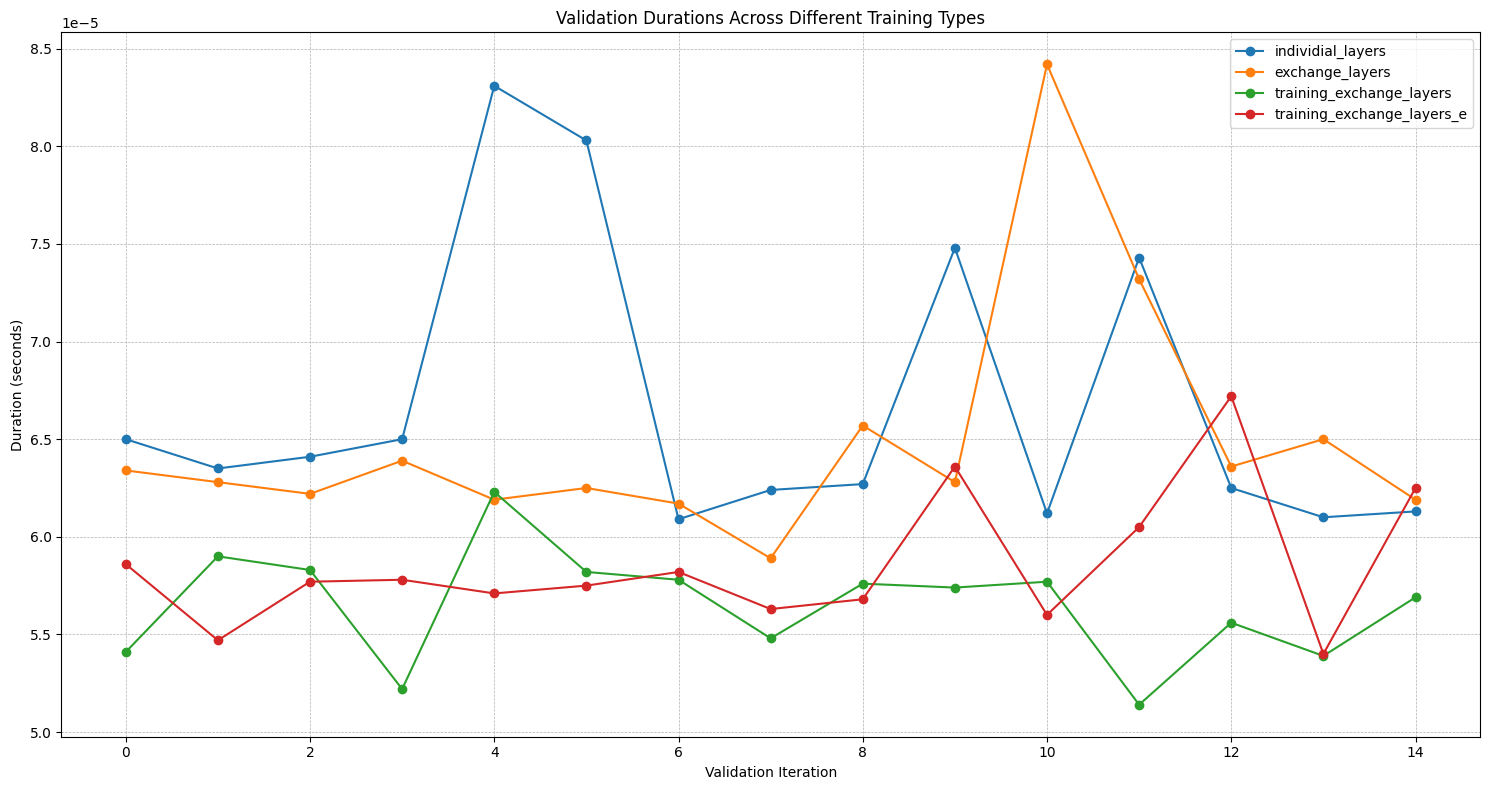

In [8]:
def visualize_validation_graph(training_types, data_name, algorithm, tipe):
    # Crear un gráfico
    plt.figure(figsize=(15, 8))
    
    for training_type in training_types:
        file_path = f'../output/{training_type}/{data_name}/{algorithm}_{data_name}_{tipe[2]}_time.csv'
        durations = extract_validation_data_from_file(file_path)
        
        plt.plot(durations, label=training_type, marker='o')
        
    plt.title('Validation Durations Across Different Training Types')
    plt.xlabel('Validation Iteration')
    plt.ylabel('Duration (seconds)')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

visualize_validation_graph(training_type, data_name, algorithm, tipe)
